In [3]:
import sys, os, time, datetime, csv
sys.path.insert(1, '/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/tools')
from tools import *
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm
from matplotlib.lines import Line2D

In [22]:
def plot_cartesian(filenames,n_section,n_files):
        fig, ax = plt.subplots(1,2,figsize = (10,5),sharey=True, tight_layout=True)
        cmap = plt.get_cmap('bwr_r')
        theta_counter = 0 # start 45 degree rotated
        total_false_edges = 0
        total_true_edges = 0
        for i in range(n_files):
            print('Plotting file: ' + filenames[i])
            X, Ri, Ro, y = load_graph(filenames[i])
            #print('Zmin: %.2f, Zmax: %.2f' %(min(X[:,2]),max(X[:,2]))   )
            X[:,1] = X[:,1] * np.pi/n_section
            theta = (X[:,1] + theta_counter)%(np.pi*2)
           
            ax[0].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)
            ax[1].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)

            #ax1.scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,2], c='k')

            feats_o = X[np.where(Ri.T)[1]]
            feats_i = X[np.where(Ro.T)[1]]

            x_o = 1000*feats_o[:,0]*np.cos(feats_o[:,1]+theta_counter)
            x_i = 1000*feats_i[:,0]*np.cos(feats_i[:,1]+theta_counter)
            y_o = 1000*feats_o[:,0]*np.sin(feats_o[:,1]+theta_counter)
            y_i = 1000*feats_i[:,0]*np.sin(feats_i[:,1]+theta_counter)

            # print only false edges
            for j in range(y.shape[0]):
                seg_args = dict(c='darkblue', alpha=1-y[j])
                ax[0].plot([x_o[j],x_i[j]],[y_o[j],y_i[j]], '-', **seg_args)
            # print only true edges
            for j in range(y.shape[0]):
                seg_args = dict(c='darkblue', alpha=y[j])
                ax[1].plot([x_o[j],x_i[j]],[y_o[j],y_i[j]], '-', **seg_args)

            # draw seperator line
            ax[0].plot([0,1100*np.cos(theta_counter-np.pi/n_section)],[0,1100*np.sin(theta_counter-np.pi/n_section)],'-', c='darkorange')
            ax[0].plot([0,1100*np.cos(theta_counter+np.pi/n_section)],[0,1100*np.sin(theta_counter+np.pi/n_section)],'-', c='darkorange')
            ax[1].plot([0,1100*np.cos(theta_counter-np.pi/n_section)],[0,1100*np.sin(theta_counter-np.pi/n_section)],'-', c='darkorange')
            ax[1].plot([0,1100*np.cos(theta_counter+np.pi/n_section)],[0,1100*np.sin(theta_counter+np.pi/n_section)],'-', c='darkorange')

            total_true_edges  += sum(y)
            total_false_edges += y.shape[0] - sum(y)

            theta_counter += 2*np.pi/n_section
            theta_counter = theta_counter%(np.pi*2)

        print('Plotting a graph with %d true, %d false, %d total edges'%(total_true_edges,total_false_edges,total_false_edges+total_true_edges))

        ax[0].set_xlabel('x [mm]')
        ax[0].set_ylabel('y [mm]')
        ax[1].set_xlabel('$x [mm]$')
        ax[1].set_ylabel('$y [mm]$')
        ax[0].set_aspect('equal')
        ax[1].set_aspect('equal')
        ax[0].set_title('Only Fake Edges (After Preprocessing)')
        ax[1].set_title('Only True Edges (After Preprocessing)')
       
        plt.show()

In [25]:
def plot_cartesian_single(filenames,n_section,n_files):
        fig, ax = plt.subplots(1,2,figsize = (10,5),sharey=True, tight_layout=True)
        cmap = plt.get_cmap('bwr_r')
        theta_counter = 0 # start 45 degree rotated
        total_false_edges = 0
        total_true_edges = 0
        
        print('Plotting file: ' + filenames)
        X, Ri, Ro, y = load_graph(filenames)
        #print('Zmin: %.2f, Zmax: %.2f' %(min(X[:,2]),max(X[:,2]))   )
        X[:,1] = X[:,1] * np.pi/n_section
        theta = (X[:,1] + theta_counter)%(np.pi*2)
        
        ax[0].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)
        ax[1].scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,0]*np.sin(theta), c='k', s=3)

        #ax1.scatter(1000*X[:,0]*np.cos(theta), 1000*X[:,2], c='k')

        feats_o = X[np.where(Ri.T)[1]]
        feats_i = X[np.where(Ro.T)[1]]

        x_o = 1000*feats_o[:,0]*np.cos(feats_o[:,1]+theta_counter)
        x_i = 1000*feats_i[:,0]*np.cos(feats_i[:,1]+theta_counter)
        y_o = 1000*feats_o[:,0]*np.sin(feats_o[:,1]+theta_counter)
        y_i = 1000*feats_i[:,0]*np.sin(feats_i[:,1]+theta_counter)

        # print only false edges
        for j in range(y.shape[0]):
            seg_args = dict(c='darkblue', alpha=1-y[j])
            ax[0].plot([x_o[j],x_i[j]],[y_o[j],y_i[j]], '-', **seg_args)
        # print only true edges
        for j in range(y.shape[0]):
            seg_args = dict(c='darkblue', alpha=y[j])
            ax[1].plot([x_o[j],x_i[j]],[y_o[j],y_i[j]], '-', **seg_args)

        # draw seperator line
        ax[0].plot([0,1100*np.cos(theta_counter-np.pi/n_section)],[0,1100*np.sin(theta_counter-np.pi/n_section)],'-', c='darkorange')
        ax[0].plot([0,1100*np.cos(theta_counter+np.pi/n_section)],[0,1100*np.sin(theta_counter+np.pi/n_section)],'-', c='darkorange')
        ax[1].plot([0,1100*np.cos(theta_counter-np.pi/n_section)],[0,1100*np.sin(theta_counter-np.pi/n_section)],'-', c='darkorange')
        ax[1].plot([0,1100*np.cos(theta_counter+np.pi/n_section)],[0,1100*np.sin(theta_counter+np.pi/n_section)],'-', c='darkorange')

        total_true_edges  += sum(y)
        total_false_edges += y.shape[0] - sum(y)

        theta_counter += 2*np.pi/n_section
        theta_counter = theta_counter%(np.pi*2)

        print('Plotting a graph with %d true, %d false, %d total edges'%(total_true_edges,total_false_edges,total_false_edges+total_true_edges))

        ax[0].set_xlabel('x [mm]')
        ax[0].set_ylabel('y [mm]')
        ax[1].set_xlabel('$x [mm]$')
        ax[1].set_ylabel('$y [mm]$')
        ax[0].set_aspect('equal')
        ax[1].set_aspect('equal')
        ax[0].set_title('Only Fake Edges (After Preprocessing)')
        ax[1].set_title('Only True Edges (After Preprocessing)')
       
        plt.show()

Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new/event000001000_g000.npz
Plotting a graph with 505 true, 533 false, 1038 total edges


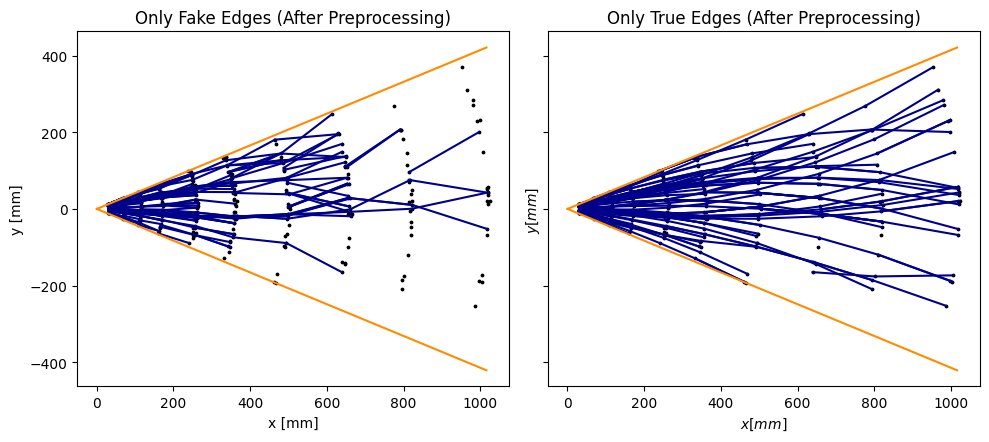

In [27]:
input_dir='/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/train_new'
n_section = 8
n_files = 16

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('My data:')
plot_cartesian_single(filenames[0],n_section,n_files)



My data:
Plotting file: /Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train/event000001000_g000.npz
Plotting a graph with 5162 true, 5508 false, 10670 total edges


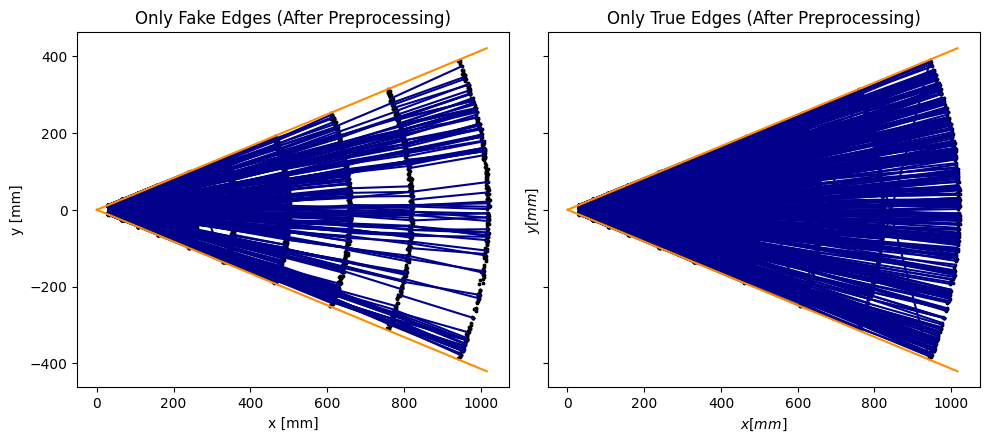

In [28]:
input_dir='/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/data_personal/tuysuz_original/train'
n_section = 8
n_files = 16

    
   
input_dir = os.path.expandvars(input_dir)
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) 
            if f.startswith('event') and f.endswith('.npz')])
filenames[:n_files] if n_files is not None else filenames


print('Their data:')
plot_cartesian_single(filenames[0],n_section,n_files)



### I've checked the file size, it looks like each of their files is 10x as large as mine (would have expected a factor of 16?)